In [1]:
%%html
<style>@font-face{font-family:myFont;src:url(v.ttf)}div.text_cell{font-family:myFont;direction:rtl;text-align:center;}</style>

# «به نام خدا»
## هوش مصنوعی 
## تمرین کامپیوتری شماره سه
## Naive Bayes Classifier
### امیرحسین دبیری اقدم - 810098024
### استاد: دکتر فدایی
#####  دانشگاه تهران - پاییز 99
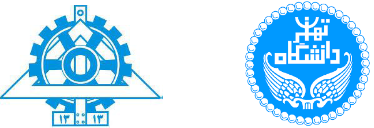
***

###  هدف پروژه  
<p dir="rtl" style="text-align: right;">تجزیه و تحلیل نگرش کامنت&shy;ها با استفاده از Na&iuml;ve Bayes Classifier <span>و تشخیص مثبت یا منفی بودن نظرات براساس متن&shy;شان. </span></p>

### مقدمه

<p dir="rtl" style="text-align: right;">پردازش متن امروزه یکی از شاخه&shy;های مهم و پرکاربرد علم هوش مصنوعی است که روش&shy;های مختلفی برای آن ابداع شده است، یکی از ساده ترین این روش ها مدل Na&iuml;ve Bayes است که برپایه قانون بیز است که فرمول کلی آن به صورت زیر است و توضیحات مربوط به آن در بخش مربوطه آمده است:</p>
$$P(c|x)=\frac{P(x|c)P(c)}{P(x)}$$
<p style="text-align: right;" dir="rtl">مجموعه داده مورد استفاده در این پروژه مربوط به نظرات ثبت شده در دیجیکالا و اینکه نویسنده نظر کالا را پیشنهاد کرده یا خیر بود که در دو فایل یکی برای train کردن مدل و یکی هم برای test آن در اختیار ما بود.</p>

### فازهای پیاده سازی پروژه


<p style="text-align: right;" dir="rtl"><strong>فاز صفر: ایمپورت کردن داده ها و کتابخانه های مورد نیاز</strong></p>

In [2]:
#importing libraries
from __future__ import unicode_literals
from hazm import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') # beautiful plots :O

In [3]:
#importing data
train_data = pd.read_csv("comment_train.csv")
test_data = pd.read_csv("comment_test.csv")

<p style="text-align: right;" dir="rtl"><strong>فاز اول: پیش پردازش داده ها</strong></p>
<p style="text-align: right;" dir="rtl">پیش پردازش داده&shy;ها از فاز&shy;های مهم پردازش متن است؛ با کمک کتابخانه هضم و ... روشهای مختلف را امتحان کردیم و در نهایت با ترکیب title و متن کامنت به صورت وزن دار و سپس استفاده از توابع normalize و lemmatize <span>کتابخانه فوق داده&shy;هارا برای فاز بعدی پیش پردازش کردیم.</span></p>
<p style="text-align: right;" dir="rtl">حذف کلمات پرتکرار stopwords که در کتابخانه هضم وجود داشت اندکی دقت مدل را کاهش میداد لذا از آن استفاده نکردیم. [احتمالا دلیل آن این است که برخی کلمات&nbsp; کلیدی مثل صفات خوب و بد... جز کلمات پر تکرار هستند ولی در این مسئله این صفات مهم هستند و حذف آنها باعث کاهش دقت مدل میشود]</p>
<p style="text-align: right;" dir="rtl">همچنین استفاده از تابع stemmer نیز باعث کاهش دقت مدل میشد لذا از آن هم استفاده نکردیم.</p>

<p style="text-align: right;" dir="rtl"><strong>1)</strong></p>
<p style="text-align: right;" dir="rtl"><strong>روش </strong><strong>stemming</strong><strong>:</strong></p>
<p style="text-align: right;" dir="rtl">در این روش کلمات (اعم از افعال و اسم&shy;ها) با فرم ساده شان جایگزین میشوند به این ترتیب که با حذف برخی حروف انتهایی یا ابتدایی(پیشوند و پسوند، نشانه جمع، شناسه و...)، کلمه ای کوتاهتر و ساده تر میسازیم.</p>
<p style="text-align: right;" dir="rtl">این عملیات مفید است زیرا که کلمات با ریشه یکسان بار معنایی تقریبا یکسانی نیز در جمله دارند پس باید این یکسان بودن را به نوعی در مدلمان در نظر بگیریم؛ لذا با جایگزین کردن ساختارهای زبانی با ریشه شان این کار تا حد خوبی انجام میگیرد.</p>
<p style="text-align: right;" dir="rtl"><strong>روش </strong><strong>lemmatization</strong><strong>:</strong></p>
<p style="text-align: right;" dir="rtl">مشابه قبل در این روش کلمات (اعم افعال و اسم&shy;ها) به فرم ساده و ریشه شان تبدیل می&shy;شوند به این ترتیب که براساس جایگاه کلمه در متن و...کلمه را با صورت خام&nbsp; و ریشه اش جایگزین میکنیم و در مدلمان از این کلمات ریشه ای استفاده میکنیم.</p>
<p style="text-align: right;" dir="rtl">به طور مشابه این عملیات نیز مفید است زیرا باعث میشود مدل ما در مواجه با کلماتی که به دلایل مختلفی مثل جایگاهشان در جمله و ... دچار تغییراتی شده اند (که این تغییرات بر محتوای معنایی متن بی تاثیر است) عملکرد مطلوبی داشته باشد.</p>
<p style="text-align: right;" dir="rtl">در حالت کلی lemmatization نیاز به پردازش بیشتری دارد نسبت به stemming و البته نتیجه بهتری هم دارد و stemming بعضا تاثیرات نامطلوبی در متن میگذارد مثلا "عالی" بر اثر آن به "عال" تبدیل میشود و... لذا از &nbsp;stemming برای پردازش داده ها استفاده نکردیم.</p>

<p style="text-align: right;" dir="rtl">در ادامه پیاده سازی توابع مورد نیاز در این فاز آمده است:</p>

In [19]:
# def remove_stopwords(str, stopwords):
#     querywords = str.split()
#     resultwords  = [word for word in querywords if word not in stopwords]
#     str = ' '.join(resultwords)
#     return str

def prep_data(table):
    normalizer = Normalizer()
    lemmatizer = Lemmatizer()
    #stemmer = Stemmer()
    #stopwords = stopwords_list()
    titles = table["title"]
    comments = table["comment"]
    recommends = table["recommend"]
    datas = list()
    
    for i in range(len(table)):
        data = comments[i]
        #data = remove_stopwords(data, stopwords)
        #data = stemmer.stem(data)
        data = normalizer.normalize(data)
        data = lemmatizer.lemmatize(data)
        datas.append(data)
    
    prep_table = pd.DataFrame(list(zip(datas, datas, recommends)) , columns = ['title', 'comment', 'recommend'])  
    return prep_table

<p dir="rtl" style="text-align: right;"><strong>فاز دوم: پیاده سازی فرآیند </strong><strong>Na</strong><strong>&iuml;</strong><strong>ve Bayes Classifier</strong></p>

$$P(c|x)=\frac{P(x|c)P(c)}{P(x)}$$

<p dir="rtl" style="text-align: right;"><strong>2)</strong></p>
<p dir="rtl" style="text-align: right;"><strong>Posterior</strong><strong>:</strong> احتمال اینکه کامنت داده شده در کلاس باشد c (در اینجا دو کلاس recommended و not recommended داریم) به شرط x که x بردار کلمات کامنت است؛ همان احتمالی است که ما به دنبال محاسبه آن هستیم تا بدانیم یک کامنت در کلاس recommended است یا not recommended و برای محاسبه آن همانطور که گفته شد از قانون بیز استفاده میکنیم.</p>
$$P(c|x)$$
<p dir="rtl" style="text-align: right;"><strong>Prior</strong><strong>: </strong>احتمال وقوع یک کلاس در حالت کلی است که برای بدست آوردن آن تعداد recommended ها و not recommended ها در train data را محاسبه میکنیم و به تعداد کل کامنتها تقسیم میکنیم و به این ترتیب این احتمال بدست می آید.</p>
$$P(c)$$
<p dir="rtl" style="text-align: right;"><strong>Likelihood</strong><strong>: </strong>برعکس Posterior است یعنی احتمال اینکه کلمات بردار x در کامنت باشد به شرط اینکه کلاس آن کامنت را بدانیم؛ برای محاسبه آن تعداد تکرار (frequency) آن کلمات را در کل کامنتهای train data که در کلاس مد نظر ما هستند را محاسبه کرده به تعداد کل کلمات آن کلاس تقسیم می&shy;کنیم و بعد از بدست آوردن آن احتمالات بر اساس <strong>Na</strong><strong>&iuml;</strong><strong>ve Bayes</strong> فرض میکنیم که این احتمالات از هم مستقل هستند لذا با ضرب کردن این احتمالات احتمال نهایی بدست می آید. (به دلیل اینکه ضرب این اعداد ممکن است خیلی کوچک بشود و بعضی از آنها توسط کامپیوتر صفر در نظر گرفته بشوند، از احتمالها لگاریتم میگیریم و حاصل آنها را با هم جمع میکینم.)</p>
$$P(x|c)$$
<p dir="rtl" style="text-align: right;"><strong>Evidence</strong>: احتمال وقوع کلمات بردار x در حالت کلی است که برای محاسبه آن میتوان به صورت غیر مستقیم و از قانون احتمال کل استفاده کرد اما در این مسئله ما برای تشخیص اینکه یک کامنت در کدام دسته قرار میگیرد دو احتمال که در ادامه آمده است را با هم مقایسه میکنیم و چون این دو احتمال مخرج یکسانی دارند و مثبت هم هست لذا در نتیجه مقایسه اثری ندارد پس نیازی نیست آنرا محاسبه کرد.</p>
$$P(x)$$
<p>$${P(c=recommended|x)=\frac{P(x|c=recommended)P(c=recommended)}{P(x)}\\ P(c=not recommended|x)=\frac{P(x|c=not recommended)P(c=not recommended)}{P(x)}}$$</p>

{'recommended': 0.5, 'not_recommended': 0.5}

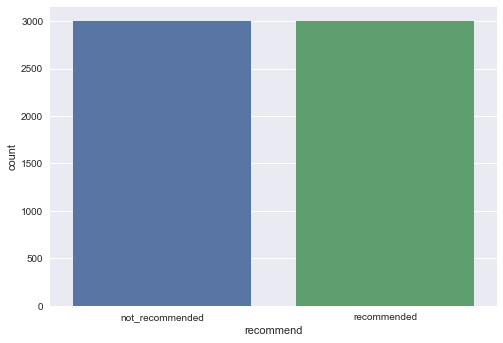

In [5]:
# calculating P_c
P_recom = sum(train_data["recommend"] == "recommended") / len(train_data["recommend"])
P_c = {"recommended" : P_recom, "not_recommended" :  1 - P_recom}
sns.countplot(train_data['recommend'])
P_c

<p dir="rtl" style="text-align: right;">در کد بالا P(c) محاسبه شده است و میبینیم که دیتا ما توزیع متوازن دارد و احتمال هردو کلاس با هم برابر و برابر با 0.5 است.</p>
<p dir="rtl" style="text-align: right;">در ادامه توابع مورد نیاز برای محاسبه فرکانس کلمات و تعداد کل کلمات آمده است:</p>

In [6]:
def words_count(table):
    count = 0
    for str in table["comment"]:
        words = str.split()
        count += len(words)
    return count

def words_freq(table):
    freqs = dict()
    for str in table["comment"]:
        words = str.split()
        for word in words:
            if word in freqs:
                freqs[word] += 1
            else:
                freqs[word] = 1
    return freqs   

<p dir="rtl" style="text-align: right;">همانطور که گفته شد برای محاسبه احتمال فرکانس هر کلمه را بر تعداد کل کلمات کلاس تقسیم میکنیم و اگرکلمه در train data ما نبوده و اولین بار آنرا ببینیم چون فرکانس آن صفر است پس احتمال آن صفر خواهد بود.</p>

In [7]:
def word_prob(freqs, word, words_count, a):
    if word in freqs:
        return freqs[word] / words_count
    else:
        return 0

<p dir="rtl" style="text-align: right;">تابع زیر تخمین میزند که یک کامنت به کدام کلاس تعلق دارد؛&nbsp; همانطور که گفته شد به دلیل اینکه مخرج دو احتمالی که با هم مقایسه میکنیم یکسان است فقط صورت آن هارا باید محاسبه کنیم و با هم مقایسه کنیم اگر یکی از احتمال ها صفر شود چون بینشان ضرب است کل صورت صفر میشود لذا کل احتمال صفر میشود پس مدل ما نتیجه میگیرد که کامنت حتما به کلاس دیگر تعلق دارد؛ همچنین همانطور که گفته شد برای افزایش دقت از لگاریتم استفاده میکنیم و چون لگاریتم یک تابع اکیدا صعودی است برای مقایسه دو احتمال همان مقادیر لگاریتیمی را میتوانیم مقایسه کنیم:</p>
$$P(x|c)P(c)=P(x_{1}|c)\times P(x_{2}|c)\times ... P(x_{n}|c)\times P(c)\xrightarrow[\log ]{}=\log P(x_{1}|c)+...+\log P(x_{n}|c) + \log P(c)$$

In [32]:
def predict(str,freqs_notrecom, freqs_recom, notrecom_words_count, recom_words_count, prob_func, a = 0.4):
    words = str.split()
    P_recom = np.log(P_c["recommended"])
    P_notrecom = np.log(P_c["not_recommended"])
    for word in words:
        p = prob_func(freqs_notrecom, word, notrecom_words_count, a)
        if (p != 0):
            P_notrecom += np.log(p)
        else:
             return "recommended"
            
        p = prob_func(freqs_recom, word, recom_words_count, a)
        if (p != 0):
            P_recom += np.log(p)
        else:
             return "not_recommended"

    if (P_recom > P_notrecom): return "recommended"
    else: return "not_recommended"

<p dir="rtl" style="text-align: right;"><strong>استفاده از روش </strong><strong>Additive Smoothing</strong><strong> برای افزایش دقت مدل</strong></p>

<p dir="rtl" style="text-align: right;"><strong>3)</strong></p>
<p dir="rtl" style="text-align: right;">همانطور که گفته شد مثلا در train data اگر "دیجیکالا" فقط در دسته recommended دیده شود و در دسته دیگر دیده نشود به دلیل اینکه فرکانس آن در دسته not recommended صفر است احتمال این کلمه صفر بدست می آید وچون درNa&iuml;ve Bayes&nbsp;فرض استقلال شرطی داریم و احتمالها را در هم ضرب میکنیم لذا در حاصل ضرب حتی اگر یک مورد صفر هم داشته باشیم کل حاصل صفر میشود پس مدل ما نتیجه میگیرد که احتمال&nbsp;not recommended کامنت صفر است پس کامنت قطعا متعلق به recommended&nbsp; است در صورتی که واضح است اینطور نیست و از صرف بودن این کلمه در یک کامنت نمیتوان به صورت قطعی اعلام کرد که نظرنویسنده کامنت مثبت است.</p>

<p dir="rtl" style="text-align: right;"><b>4)</b></p>
<p dir="rtl" style="text-align: right;">برای رفع مشکل صفر شدن احتمال از روش&nbsp;Additive Smoothing استفاده میکنیم به این ترتیب که: برای محاسبه احتمال، صورت و مخرج&nbsp; کسر را با یک ترم ثابت جمع میکنیم و به اصطلاح داده ها Smooth میشوند و به این ترتیب دیگر ممکن نیست احتمالی صفر شود.</p>


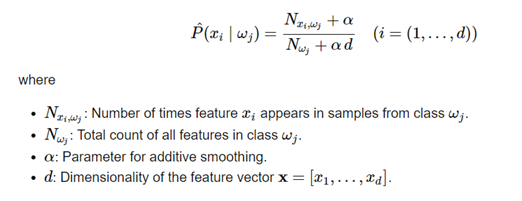
<p dir="rtl" style="text-align: right;"><a href="https://sebastianraschka.com/Articles/2014_naive_bayes_1.html">منبع :&nbsp;https://sebastianraschka.com/Articles/2014_naive_bayes_1.html</a></p>
<p dir="rtl" style="text-align: right;">علت اینکه مخرج مستقیم با آلفا جمع نشده این است که ما هیچ اطلاعی در مورد کلمه جدید نداریم و لذا باید فرض کنیم که به صورت uniform در هر کلاس توزیع شده است لذا آلفا را در تعداد feature های کلاس ضرب میکنیم؛ درنهایت به تابع محاسبه احتمال به صورت Smooth میرسیم که کد در ادامه آمده است؛ نکته ای که در اینجا حائز اهمیت است انتخاب هایپرپارامتر آلفا است و انتخاب آن بر دقت مدل اثر گذار است.</p>
<p dir="rtl" style="text-align: right;"><a href="https://medium.com/analytics-vidhya/intuition-behind-naive-bayes-algorithm-laplace-additive-smoothing-e2cb43a82901">منبع:&nbsp;https://medium.com/analytics-vidhya/intuition-behind-naive-bayes-algorithm-laplace-additive-smoothing-e2cb43a82901</a></p>

In [9]:
def word_prob_smoothed(freqs, word, words_count, a = 0.4):
    d = len(freqs)
    if word in freqs:
        return (freqs[word] + a) / (words_count + a * d)
    else:
        return  a / (words_count + a * d)

<p dir="rtl" style="text-align: right;"><strong>فاز سوم: ارزیابی مدل</strong></p>

In [10]:
 def evaluate(preproccess, smooth, a = 0.4, print_result = 1, print_wrong = 0):
    evaluate_train_data = train_data.copy()
    evaluate_test_data = test_data.copy()
    prob_func = word_prob
    
    #weighted concatenating comments and titles and storing in comment column
    evaluate_train_data["comment"] = 2 * (evaluate_train_data["title"] + " ") + evaluate_train_data["comment"]
    evaluate_test_data["comment"] = 2 * (evaluate_test_data["title"] + " ") + evaluate_test_data["comment"]
    
    if (preproccess):
       # preproccesing data
        evaluate_train_data = prep_data(evaluate_train_data)
        evaluate_test_data =  prep_data(evaluate_test_data)
        
    if (smooth):
        #use additive smoothing
        prob_func = word_prob_smoothed
    
    #separating recommended and not recommended rows
    evaluate_train_data_recom = evaluate_train_data[evaluate_train_data["recommend"] == "recommended"]
    evaluate_train_data_notrecom = evaluate_train_data[evaluate_train_data["recommend"] != "recommended"]

    evaluate_test_data_recom = evaluate_test_data[evaluate_test_data["recommend"] == "recommended"]
    evaluate_test_data_notrecom = evaluate_test_data[evaluate_test_data["recommend"] != "recommended"]

    #calculation words frequency
    freqs_recom = words_freq(evaluate_train_data_recom)
    freqs_notrecom = words_freq(evaluate_train_data_notrecom)

    #calculating whole words count
    notrecom_words_count = words_count(evaluate_train_data_notrecom)
    recom_words_count = words_count(evaluate_train_data_recom)    
    
    count_correct = 0
    count_correct_recommended = 0
    count_recommended = 0
    
    for i in range(len(evaluate_test_data)):
        data = evaluate_test_data["comment"][i]
        prediction = predict(data, freqs_notrecom, freqs_recom, notrecom_words_count, recom_words_count, prob_func, a)
        if (prediction == evaluate_test_data["recommend"][i]): count_correct += 1
        if (prediction == "recommended"):
            count_recommended += 1
            if (prediction == evaluate_test_data["recommend"][i]): count_correct_recommended += 1
            elif (print_wrong): print("Comment #%d" %(i))

    accuracy = count_correct / len(evaluate_test_data)
    precision =  count_correct_recommended / count_recommended
    recall = count_correct_recommended / len(evaluate_test_data_recom)
    F1 = 2 * (precision * recall)/(precision + recall)
    
    if (print_result):
        print("Accuracy:", 100 * accuracy)
        print("Precision:", 100 * precision)
        print("Recall:", 100 * recall)
        print("F1:", 100 * F1)
    else: return [accuracy, precision, recall, F1]

In [31]:
accuracy = list()
precision = list()
recall = list()
f1 = list()
for a in range(25):
    result = evaluate(1,1, a / 25,0,0)
    accuracy.append(100 * result[0])
    precision.append(100 * result[1])
    recall.append(100 * result[2])
    f1.append(100 * result[3])

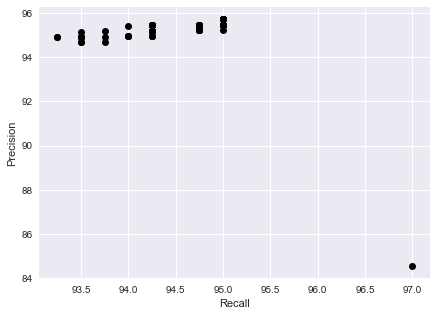

In [36]:
plt.figure(figsize = (7,5))
plt.plot(recall, precision,'ko')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

<p dir="rtl" style="text-align: right;">میبینیم که دو معیار&nbsp;precision و&nbsp;recall رابطه عکس دارند(تقریبا) یعنی جایی که&nbsp;precision&nbsp; زیاد است&nbsp;recall&nbsp; کم است و برعکس</p>

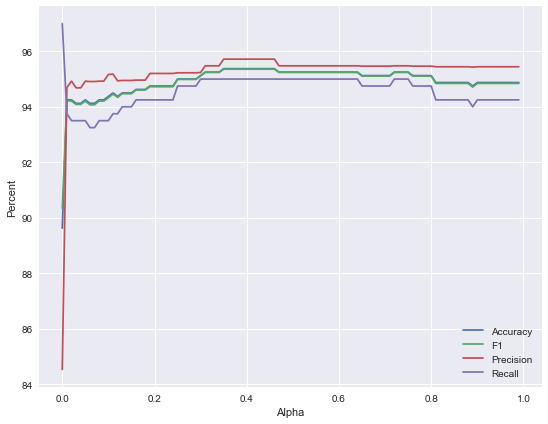

In [34]:
plt.figure(figsize = (9,7))
plt.plot(np.arange(0, 1, 1/len(accuracy)), accuracy,label = 'Accuracy')
plt.plot(np.arange(0, 1, 1/len(f1)), f1,label = 'F1')
plt.plot(np.arange(0, 1, 1/len(precision)), precision,label = 'Precision')
plt.plot(np.arange(0, 1, 1/len(recall)), recall,label = 'Recall')
plt.xlabel('Alpha')
plt.ylabel('Percent')
plt.legend()
plt.show()

<p style="text-align: right;">طبق نمودار بالا میبینیم آلفا در حدود <strong>0.4</strong> مقدار هر 4 معیار اندازه گیری شده در در بیشترین حد خود قرار دارند.</p>

In [18]:
evaluate(preproccess = 1, smooth = 1)

Accuracy: 95.375
Precision: 95.71788413098237
Recall: 95.0
F1: 95.35759096612296


<p dir="rtl" style="text-align: right;"><strong>5)</strong></p>
<p dir="rtl" style="text-align: right;"><strong>Recall</strong><strong>: </strong>به نوعی معیاری برای حساسیت مدل است، یعنی مدل ما از میان تمام recommended ها چه تعداد را توانسته تشخیص بدهد، این معیار کاری ندارد که مدل ما not recommended ها را هم recommended تشخیص بدهد و فقط مهم این است که تعداد recommended <span>های بیشتری را تشخیص دهد لذا براساس این معیار مدلی که همه کامنتها را </span>recommended تشخیص میدهد مدل خوبی است (مقدار recall چنین مدلی یک است) اما میدانیم چنین مدلی اصلا مدل کارایی نیست و مثلا در تشخیص ایمیل spam <span>این مدل که</span> recall بالایی دارد اصلا مناسب نیست.</p>
<p dir="rtl" style="text-align: right;"><strong>Precision</strong><strong>: </strong>این معیار برای این است که ببینیم از میان recommended هایی که مدل ما تشخیص داده چه تعداد واقعا recommended بودند، این معیار برای یک مدل اگر بالا باشد یعنی آن مدل false positive کمی دارد. مثلا فرض کنیم در داده های ما 100 کامنت با لیبل recommended وجود دارد و مدل ما فقط 5 تا recommended تشخیص میدهد و هر 5تا&nbsp; هم درست هستند و واقعا recommended اند لذا مقدار Precision آن یک است (ولی مقدار recall آن 0.05 که خیلی کوچک است) اما این مدل کارکرد مناسبی ندارد زیرا که تعداد زیادی از recommended ها را not recommended تشخیص داده که اصلا خوب نیست مثلا در تشخیص بیماری چنین مدلی واقعا به درد نمیخورد زیرا خیلی از بیماران را تشخیص نمیدهد.</p>

<p style="text-align: right;" dir="rtl"><strong>6)</strong></p>
<p style="text-align: right;" dir="rtl"><strong>F1</strong> میانگین هارمونیکی Recall و Precision است که تقریبا برابر با میانگین این دو است وقتی به هم نزدیک هستند که در نمودار بالا هم چنین چیزی مشاهده میشد.</p>
<p style="text-align: right;" dir="rtl">علت میانگین گیری این است که همانطور که دیدیم Recall و Precision دو معیار متفاوت هستند و هردوی آنها برای اینکه کارایی یک مدل را بسنجیم باید استفاده شود. بهترین مدل مدلی است که هردو معیار برای آن یک باشد اما معمولا این چنین نیست چون این دو معیار عکس هم عمل میکنند وقتی سعی کنیم یکی را زیاد کنیم دیگری کم میشود لذا با استفاده از F1 و ماکسیمم کردن آن یک بالانسی بین Recall و Precision خواهیم داشت؛ البته در مسائل مختلف ممکن است یکی را بر دیگری ترجیح دهیم و در کل یک trade off بین Recall و Precision <span>است که متناسب با هر مسئله باید تصمیم گیری شود.</span></p>
<p style="text-align: right;" dir="rtl">در نهایت با ماکسیمم کردن F1 و accuracy به یک مدل کارا میرسیم که در این پروژه مدل ما برای هردو به مقدار +95 درصد رسیده است که دقت نسبتا مناسبی میباشد.</p>

<p style="text-align: right;"><strong>7) </strong></p>
<p style="text-align: right;">&nbsp;در جدول زیر مقادیر 4 معیار Accuracy,Precision,Recall,F1 برای 4 حالت زیر آمده است:</p>
<ol style="list-style-type: lower-alpha;">
<li style="text-align: right;">انجام هردوی پیش پردازش و additive smoothing</li>
<li style="text-align: right;">فقط additive smoothing</li>
<li style="text-align: right;">فقط پیش پردازش</li>
<li style="text-align: right;">هیچ کدام</li>
</ol>

<table class="tg" style="border-collapse: collapse; border-color: #bbbbbb; border-spacing: 0px; table-layout: fixed; width: 521px; height: 190px;"><colgroup><col style="width: 26px;" /><col style="width: 74px;" /><col style="width: 62px;" /><col style="width: 26px;" /><col style="width: 26px;" /></colgroup>
<thead>
<tr>
<th style="background-color: #9de0ad; color: #493f3f; font-family: Arial, sans-serif; font-size: 14px; font-weight: normal; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 52.4px; text-align: center;">&nbsp;</th>
<th style="background-color: #9de0ad; color: #493f3f; font-family: Arial, sans-serif; font-size: 14px; font-weight: bold; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 170px; text-align: center;">Accuracy</th>
<th style="background-color: #9de0ad; color: #493f3f; font-family: Arial, sans-serif; font-size: 14px; font-weight: bold; overflow: hidden; padding: 10px 5px; text-align: center; vertical-align: top; word-break: normal; width: 140.4px;">Precision</th>
<th style="background-color: #9de0ad; color: #493f3f; font-family: Arial, sans-serif; font-size: 14px; font-weight: bold; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 51.6px; text-align: center;">Recall</th>
<th style="background-color: #9de0ad; color: #493f3f; font-family: Arial, sans-serif; font-size: 14px; font-weight: bold; overflow: hidden; padding: 10px 5px; text-align: center; vertical-align: top; word-break: normal; width: 51.6px;">F1</th>
</tr>
</thead>
<tbody>
<tr>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; font-weight: bold; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 52.4px; text-align: center;">a</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 170px; text-align: center;">95.375</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 140.4px; text-align: center;">95.72</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 51.6px; text-align: center;">&nbsp;95.0</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; text-align: center; vertical-align: top; word-break: normal; width: 51.6px;">95.3576</td>
</tr>
<tr>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; font-weight: bold; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 52.4px; text-align: center;">b</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 170px; text-align: center;">95.0</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 140.4px; text-align: center;">95.45</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 51.6px; text-align: center;">94.5</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; text-align: center; vertical-align: top; word-break: normal; width: 51.6px;">94.975</td>
</tr>
<tr>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; font-weight: bold; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 52.4px; text-align: center;">c</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; text-align: center; vertical-align: top; word-break: normal; width: 170px;">89.625</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; text-align: center; vertical-align: top; word-break: normal; width: 140.4px;">84.53</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 51.6px; text-align: center;">&nbsp;97.0</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; text-align: center; vertical-align: top; word-break: normal; width: 51.6px;">90.3376</td>
</tr>
<tr>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; font-weight: bold; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 52.4px; text-align: center;">d</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 170px; text-align: center;">88.625</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 140.4px; text-align: center;">83.37</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; vertical-align: top; word-break: normal; width: 51.6px; text-align: center;">96.5</td>
<td style="background-color: #e0ffeb; color: #594f4f; font-family: Arial, sans-serif; font-size: 14px; overflow: hidden; padding: 10px 5px; text-align: center; vertical-align: top; word-break: normal; width: 51.6px;">89.455</td>
</tr>
</tbody>
</table>

<p style="text-align: right;"><strong>8)</strong></p>
<p style="text-align: right;">از جدول فوق میبینیم که در حالت بدون پیش پردازش مقادیر Accuracy و F1 اندکی کمتر از 90 درصد است که انتظار داریم با انجام پیش پردازش بهبود پیدا کند که همینطور هم هست و با پیش پردازش داده ها دقت مدل اندکی افزایش می یابد؛ البته پیش پردازش انجام شده توسط کتابخانه هضم خیلی موثر واقع نمیشود زیرا زبان فارسی زبان نسبتا پیچیده ایست و انجام lemmatization &nbsp;و عملیاتهای دیگر برای پیش پردازش سخت است لذا در اینجا تاثیر زیادی بعد از اعمال پیش پردازش روی دقت مدل نمیبینیم چون کتابخانه مورد استفاده عملکرد بالایی از خود نشان نمیدهد.</p>
<p style="text-align: right;">اما مشکل اصلی مدل های Classifier که بر اساس Na&iuml;ve Bayes هستند مربوط به لغات جدیدی است که در train data نبودند و &nbsp;احتمال آنها صفر میشود که با استفاده از روش additive smoothing و انتخاب آلفا مناسب دقت مدل تا حد خوبی (95&nbsp;درصد) افزایش میابد که وقتی هردوی روشهای مذکور اعمال شود به دقت نسبتا خوب و قابل قبول میرسیم.(95+ درصد)</p>

<p dir="rtl" style="text-align: right;">&nbsp;<strong>9)</strong></p>
<p dir="rtl" style="text-align: right;">5 مورد زیر توسط مدل ما به اشتباه recommended تشخیص داده شده اند:<strong>&nbsp;</strong></p>
<ol dir="rtl" style="text-align: right;">
<li style="text-align: right;">
<p style="text-align: right;">خیلی دیر شارژ میکنه نسبت به بقیه شارژر های فندکی</p>
</li>
<li style="text-align: right;">
<p style="text-align: right;">اگر سایز شما 38 است باید سایز41 بخرید همین. در کل.صندل خوبی است</p>
</li>
<li style="text-align: right;">سلام این دستگاه خیلی خوب نیست&nbsp; وقتی صدا پخش می کند نویز داره و صداش بم هم داره خیلی صداش خوب نیست</li>
<li style="text-align: right;">
<p style="text-align: right;">&nbsp;بسیار زیبا و بسیار بی دوام.</p>
</li>
<li style="text-align: right;">خوبه ولی قدرت باد کمی داره</li>
</ol>
<p dir="rtl" style="text-align: right;">یک نکته ای که در موارد بالا دیده میشود اکثرا به دلیل کوتاه بودن جملات و کم بودن کلمات مدل ما به درستی نتوانسته تشخیص بدهد؛ همچنین مثلا تکرار برخی کلمات مثل خوب و بسیار و... در جملات باعث شده مدل به اشتباه انها را با معنای مثبت در نظر بگیرد در صورتی فعل منفی معنای آنها را منفی کرده است که در مدل bag of words این موارد به سادگی قابل تشخیص نیست.</p>
<p dir="rtl" style="text-align: right;">مورد دیگری که وجود دارد کنایه آمیز بودن کامنتها و نیز ممتنع بودن کامنتهاست به این صورت که حتی اگر توسط انسان هم بررسی میشد ممکن بود درست تشخیص ندهد زیرا وقتی گفته میشود در کل خوب است انتظار داریم که در کلاس recommended قرار بگیرد اما به هر دلیل این اتفاق نیفتاده.</p>
<p dir="rtl" style="text-align: right;">اخرین نکته ای که میتوان گفت این است که یک صفت مثل "دیر" شاید برای باتری صفت خوب و برای شارژر بد باشد لذا مدل ما باید با داده بیشتری آموزش ببیند تا صفات مختلف برای کلمات مختلف را ببیند و بهتر بتواند تصمیم گیری کند.</p>
<p dir="rtl" style="text-align: right;"><strong>نتیجه گیری:&nbsp;</strong>در صورت بزرگتر بودن train data&nbsp; و همچنین اعمال lemmatization بهینه تر و در کل preproccess بهتر میتوان دقت مدل را افزایش داد اما نباید انتظار داشته باشیم با این روشها به دقت 100 درصد برسیم زیرا زبان انسان پیچیدگی های فراوانی دارد(کنایه آمیز بودن و وجود ساختار های پیچیده و...) که درک درست آن نیازمند مدلی پیشرفته تر از&nbsp;Na&iuml;ve Bayes&nbsp; است.</p>